In [14]:
from bs4 import BeautifulSoup as soup
import requests 
from urllib.request import urlopen as ureq
import re
import pandas as pd
import nltk
from  nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk import tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt

In [16]:
url="https://speakola.com/motivate/apj-abdul-kalam-iit-madras-2010"
uclient=ureq(url)
page_html=uclient.read()
uclient.close()
page_soup=soup(page_html,"html.parser")
data=page_soup.find_all('div',{"class":"sqs-block html-block sqs-block-html"})
useful_data=data[0].find_all('p')


per_data=[]
erase=[]
complete_erase=[]
for i in range(len(useful_data)):
    length=len(useful_data[i])
    per_data.append(useful_data[i])   
    
    erase.append(re.sub("<.*?>", "", str(useful_data[i]).strip()))
    complete_erase.append(re.sub(r"[^\w]"," ",str(erase[i]).strip()))
#print(complete_erase)

with open('APJ_summery.txt', 'w') as f:
    for i in range(len(complete_erase)):
        f.write("%s\n" % complete_erase[i])
        
        
        
st_word=stopwords.words('english')
f=open('APJ_summery.txt','r')
file_read=f.read()
words=word_tokenize(file_read)
use=[i for i in words if i.lower() not in st_word]


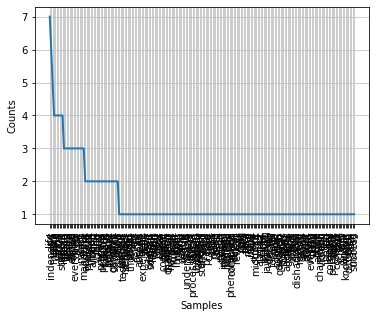

216
2010
iit
madra
india
delight
indian
institut
technolog
address
member
renown
place
learn
guest
present
greet
friend
begin
want
share
thought
youth
met
far
11
million
like
decad
time
abroad
seen
hope
experienc
pain
walk
aspir
heard
despair
experi
made
someth
would
learnt
everi
uniqu
world
around
best
day
night
make
everybodi
els
conveni
first
glanc
satisfi
long
vision
challeng
therefor
young
fight
hardest
battl
human
ever
imagin
never
stop
arriv
destin
requir
excel
let
us
understand
detail
self
impos
direct
life
processexcel
accid
process
individu
organ
nation
continu
strive
better
oneself
perform
standard
set
work
dream
focu
prepar
take
calcul
risk
get
deter
failur
move
toward
step
tend
reach
origin
target
potenti
increas
therebi
multipli
unend
cycl
phenomenon
competit
anyon
cultur
import
father
reflect
give
79
year
part
pre
independ
jubil
post
era
recal
one
incid
took
eve
stroke
midnight
14
15
august
1947
prime
minist
Pt
jawaharl
nehru
declar
300
foreign
rule
rejoic
countri
sudden

In [69]:
ps_list=[]
ps=PorterStemmer()
for i in use:
    ps_list.append(ps.stem(i))


word_freq=nltk.FreqDist(ps_list)
word_freq.plot()
print(len(word_freq))
for j in word_freq:
    print(j)

In [47]:
highest_weight=(word_freq.most_common()[0])[1]
all_weight=[]

In [48]:
for i in range(len(list(word_freq.values()))):
              all_weight.append((list(word_freq.values())[i])/highest_weight)
               

In [115]:
per_data_x=[]
xxx=[]
for i in range(len(useful_data)):
    length_x=len(useful_data[i])
    per_data_x.append(useful_data[i])   
    
    xxx.append(re.sub("<.*?>", "", str(useful_data[i]).strip()))
    
    

#print(xxx)
decending_weight=[]
for i in range(len(xxx)):
    decending_weight.append(0)
for i in range(len(xxx)):
    counter=0
    for j in word_freq:
        
        if (xxx[i].lower()).find(j)!=-1:
            decending_weight[i]=decending_weight[i]+all_weight[counter]
            #print(xxx[i])
            #print(j)
            
        counter =counter+1 
        
        
#for i in word_freq:
#    print(i)
    
    
print(len(xxx))
for i in range(len(xxx)):
    print(decending_weight[i])

11
1.7142857142857144
4.285714285714286
8.42857142857143
5.2857142857142865
3.9999999999999987
13.71428571428571
0.8571428571428571
14.142857142857132
3.428571428571428
3.1428571428571423
10.714285714285706


In [86]:
(xxx[8].lower()).find('friend')

-1

In [107]:
all_weight[2]
    

0.5714285714285714